# Task 2: Customer Segmentation Using Unsupervised Learning

# **Problem Statement** 

**Objective:**
To segment customers into distinct groups based on their purchasing behavior and demographics using unsupervised learning. The goal is to identify meaningful customer clusters and propose targeted marketing strategies for each segment.

**Business Relevance:**

Customer segmentation enables businesses to:

Personalize marketing campaigns

Improve customer retention

Optimize product recommendations

Allocate marketing budgets efficiently

# **Dataset Description**

Dataset: Mall Customers Dataset
Typical Features:

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1-100)

Target:
No target variable (unsupervised learning).

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# **Exploratory Data Analysis (EDA)**

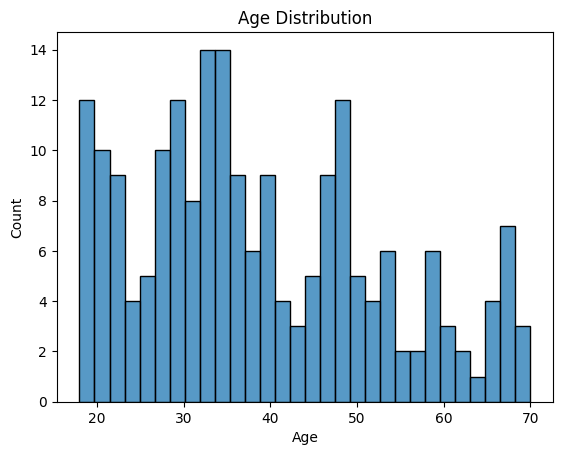

In [4]:
sns.histplot(df['Age'], bins=30)
plt.title("Age Distribution")
plt.show()


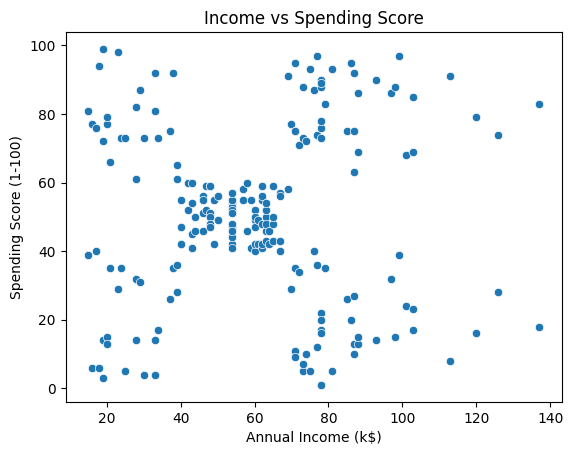

In [5]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()


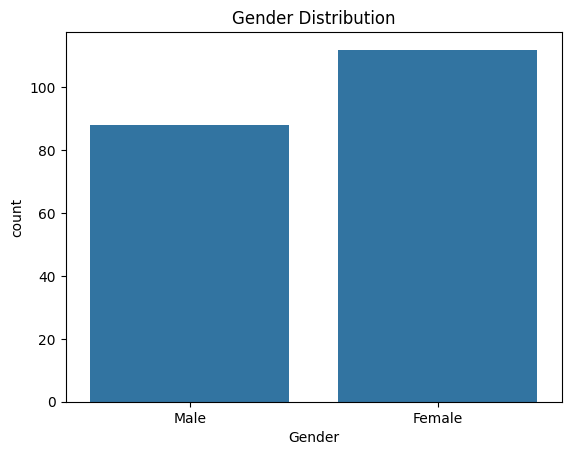

In [6]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


# **Data Preprocessing**

In [7]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [8]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Optimal Number of Clusters**

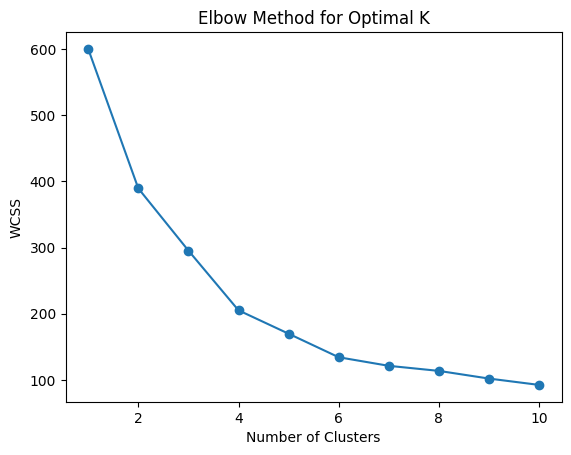

In [10]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


# **K-Means Clustering**

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [12]:
df['Cluster'].value_counts()


Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64

# **Cluster Visualization (PCA)**

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]


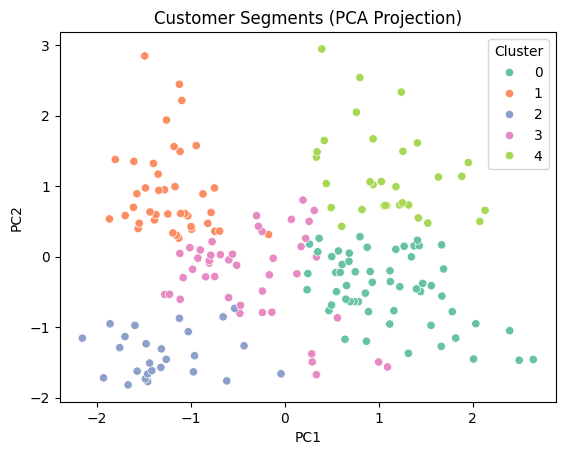

In [14]:
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set2',
    data=df
)
plt.title("Customer Segments (PCA Projection)")
plt.show()


# **Cluster Interpretation**

In [15]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


# **Marketing Strategy**
| Cluster | Characteristics                       | Suggested Strategy              |
| ------- | ------------------------------------- | ------------------------------- |
| 0       | High income, high spending            | Premium loyalty programs        |
| 1       | High income, low spending             | Upselling & personalized offers |
| 2       | Low income, high spending             | Discount bundles                |
| 3       | Low income, low spending              | Cost-efficient mass marketing   |
| 4       | Young, moderate income, high spending | Social media campaigns          |

# **Final Conclusion**
K-Means clustering successfully segmented customers into five distinct behavioral groups. PCA visualization demonstrated clear separability among clusters. These segments can be directly leveraged for targeted marketing strategies, improving customer engagement and business outcomes.